In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB

In [2]:
df = pd.read_csv('/home/bashar/Downloads/ML/voice-classification.csv')
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [3]:
df.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


<AxesSubplot: >

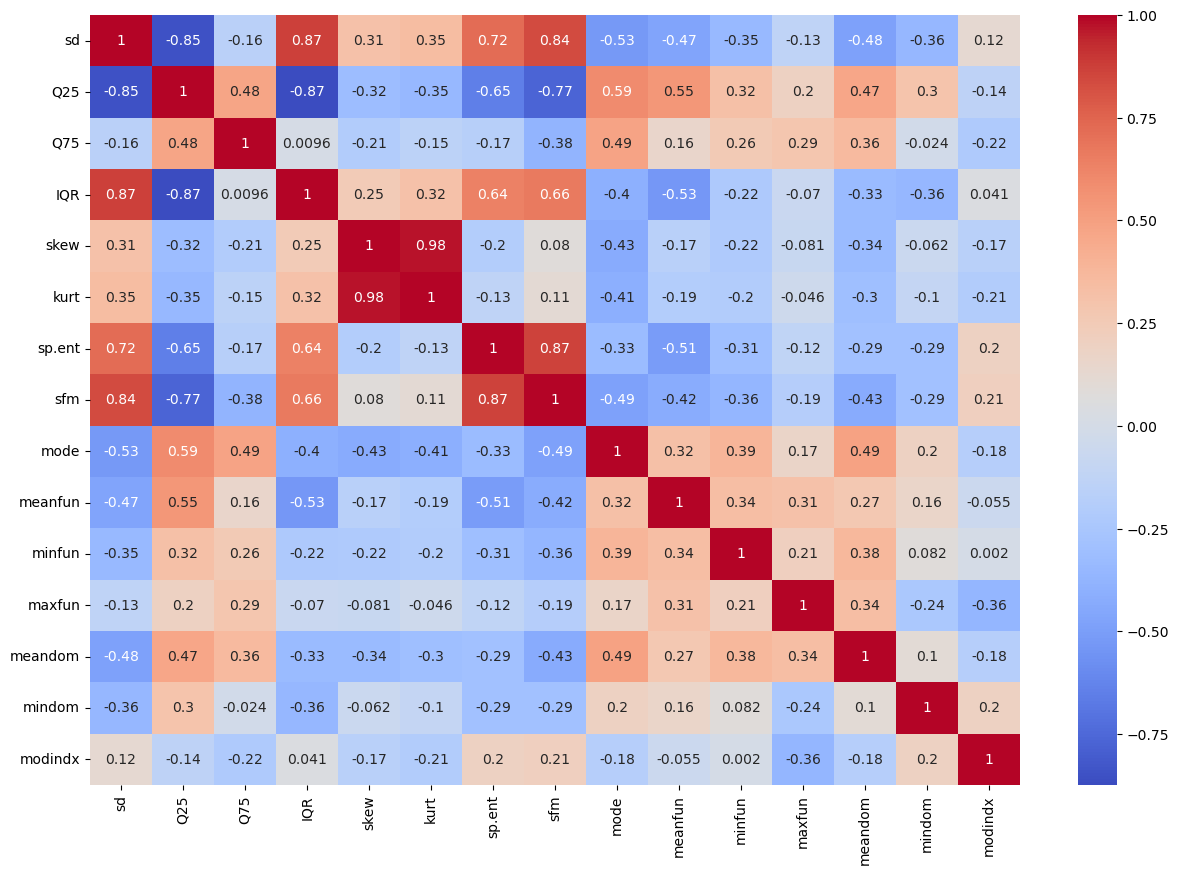

In [29]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

In [5]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

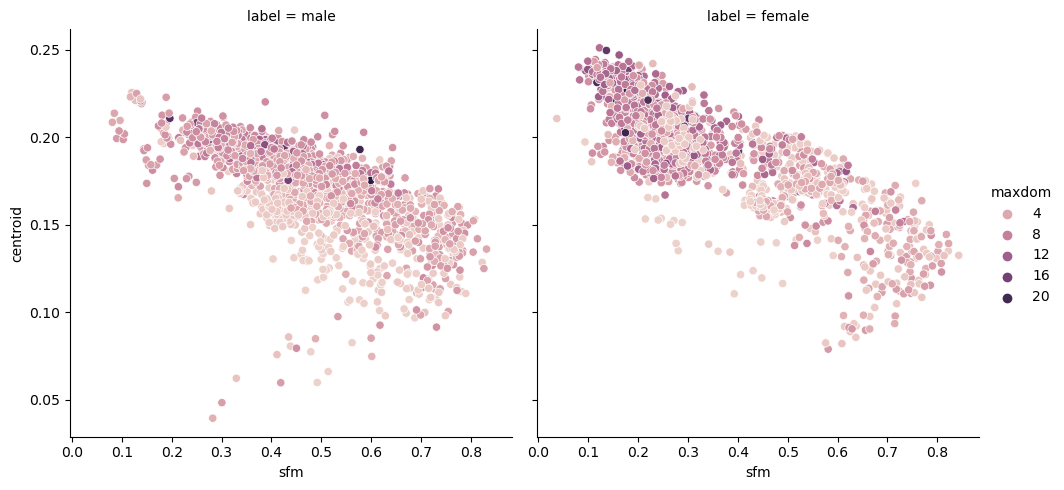

In [6]:
sns.relplot(data=df,x='sfm',y='centroid',col='label',hue='maxdom')

In [7]:
df = df.drop(['centroid', 'maxdom','dfrange'], axis = True)
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,0.000000,0.084279,0.015702,0.275862,0.007812,0.007812,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.107937,0.015826,0.250000,0.009014,0.007812,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.098706,0.015656,0.271186,0.007990,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.007812,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,0.007812,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.182790,0.083770,0.262295,0.832899,0.007812,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.188980,0.034409,0.275862,0.909856,0.039062,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.209918,0.039506,0.275862,0.494271,0.007812,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.172375,0.034483,0.250000,0.791360,0.007812,0.311002,female


In [8]:
df = df.drop(['meanfreq', 'median'], axis = 1)
df

,sd,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,modindx,label
0,0.064241,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,0.000000,0.084279,0.015702,0.275862,0.007812,0.007812,0.000000,male
1,0.067310,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.107937,0.015826,0.250000,0.009014,0.007812,0.052632,male
2,0.083829,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.098706,0.015656,0.271186,0.007990,0.007812,0.046512,male
3,0.072111,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.007812,0.247119,male
4,0.079146,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,0.007812,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.084734,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.182790,0.083770,0.262295,0.832899,0.007812,0.161929,female
3164,0.089221,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.188980,0.034409,0.275862,0.909856,0.039062,0.277897,female
3165,0.095798,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.209918,0.039506,0.275862,0.494271,0.007812,0.194759,female
3166,0.090628,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.172375,0.034483,0.250000,0.791360,0.007812,0.311002,female


In [9]:
x = df.iloc[: , 0:15]

In [10]:
x

,sd,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,modindx
0,0.064241,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,0.000000,0.084279,0.015702,0.275862,0.007812,0.007812,0.000000
1,0.067310,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.107937,0.015826,0.250000,0.009014,0.007812,0.052632
2,0.083829,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.098706,0.015656,0.271186,0.007990,0.007812,0.046512
3,0.072111,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.007812,0.247119
4,0.079146,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,0.007812,0.208274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.084734,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.182790,0.083770,0.262295,0.832899,0.007812,0.161929
3164,0.089221,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.188980,0.034409,0.275862,0.909856,0.039062,0.277897
3165,0.095798,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.209918,0.039506,0.275862,0.494271,0.007812,0.194759
3166,0.090628,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.172375,0.034483,0.250000,0.791360,0.007812,0.311002


In [11]:
y = df.iloc[:,-1:]

In [12]:
y

,label
0,male
1,male
2,male
3,male
4,male
...,...
3163,female
3164,female
3165,female
3166,female


In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.75, random_state= 42)

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rc = RandomForestClassifier()

In [16]:
rc.fit(x_train, y_train)

/tmp/ipykernel_20848/228620636.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rc.fit(x_train, y_train)


RandomForestClassifier()

In [17]:
y_pred = rc.predict(x_test)

In [18]:
accuracy1 = rc.score(x_test, y_test)
print("Accuracy:", accuracy1)

Accuracy: 0.9810606060606061


In [19]:
print('classification_score')
print(classification_report(y_test, y_pred))

classification_score
              precision    recall  f1-score   support

      female       0.97      0.99      0.98       367
        male       0.99      0.98      0.98       425

    accuracy                           0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792



In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
LC = LogisticRegression()

In [22]:
LC.fit(x_train,y_train)

/home/bashar/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bashar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pred1 = LC.predict(x_test)

In [24]:
accuracy2 = rc.score(x_test, y_test)
print("Accuracy:", accuracy2)

Accuracy: 0.9810606060606061


In [25]:
print('classification_score')
print(classification_report(y_test, y_pred))

classification_score
              precision    recall  f1-score   support

      female       0.97      0.99      0.98       367
        male       0.99      0.98      0.98       425

    accuracy                           0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792

